In [1]:
clear all
cd matlab
open sampling_demo

In [2]:
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

In [3]:
w0 = 1;        % fundamental frequency rad/s
t0=2*pi/w0;    % period s
tmax = 1.5*t0; % plottable range

In [4]:
syms s t
zeta = 0.3;
H = w0^2/(s^2 + 2*zeta*w0*s + w0^2)

H =


1/(s^2 + (3*s)/5 + 1)


In [5]:
h = ilaplace(H)

h =


(10*91^(1/2)*exp(-(3*t)/10)*sin((91^(1/2)*t)/10))/91


In [6]:
t = linspace(0,tmax,100);
xc = eval(h); % eval evaluates a symbolic expression as a MATLAB command.
tc = t;

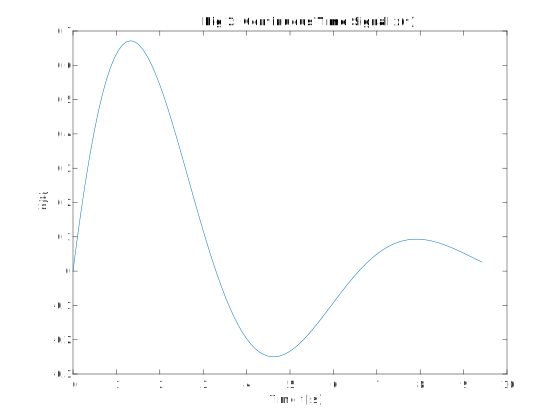

In [7]:
plot(tc,xc)
title('Fig 1: Continuous Time Signal x(t)')
ylabel('x(t)')
xlabel('Time t [s]')

In [8]:
ws = 4*w0; % twice minimum!
Ts = (2*pi)/ws;
t = 0:Ts:tmax;
xs = eval(h);
td = t;

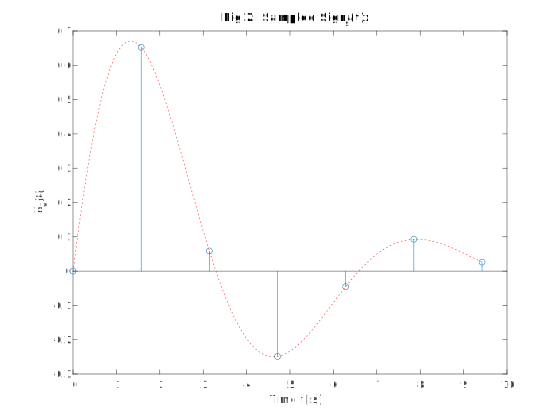

In [9]:
stem(td,xs)
hold on
plot(tc,xc,'r:')
hold off
title('Fig 2: Sampled Signal x_s(t)')
ylabel('x_s(t)')
xlabel('Time t [s]')

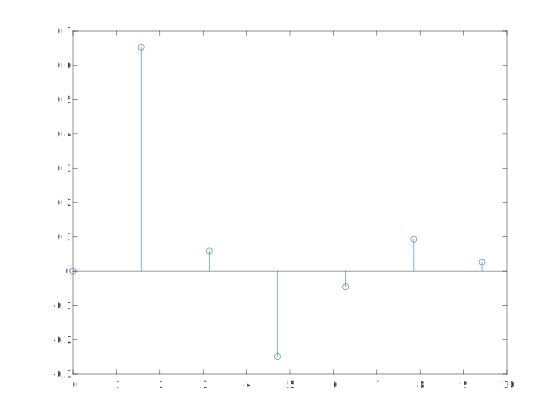

In [10]:
stem(td,xs)
hold on

In [11]:
x = zeros(length(td),length(tc));
for k=1:length(td)
    xk = xs(k);
    sincx = xk*sin(pi*(tc - td(k))/Ts)./(pi*(tc - td(k))/Ts);
    x(k,:) = sincx;
end

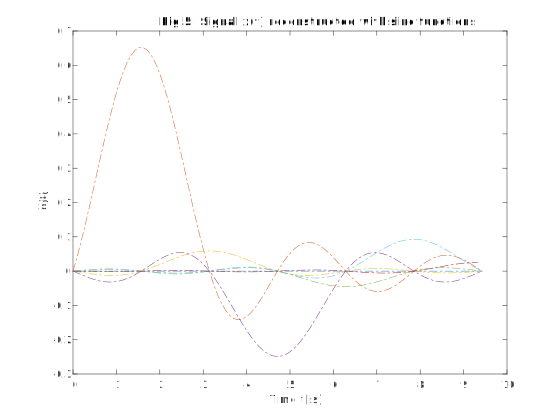

In [12]:
plot(tc,x,'-.')
hold off
title('Fig 5: Signal x(t) reconstructed with sinc functions')
ylabel('x(t)')
xlabel('Time t [s]')

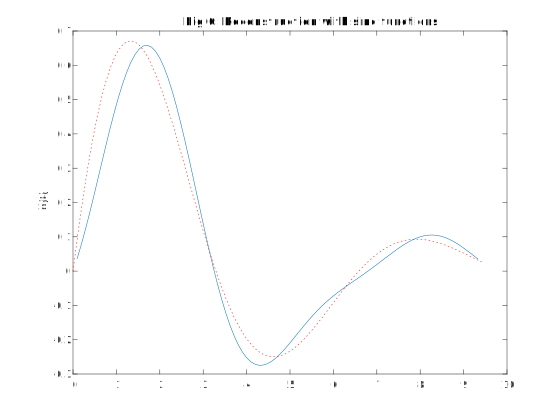

In [13]:
plot(tc,sum(x),tc,xc,'r:')
title('Fig 6: Reconstruction with sinc functions')
ylabel('x(t)')

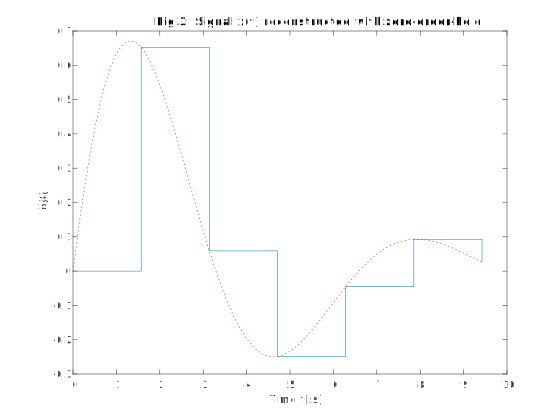

In [14]:
stairs(td,xs)
hold on
plot(tc,xc,'r:')
title('Fig 3: Signal x(t) reconstructed with zero-order-hold')
ylabel('x(t)')
xlabel('Time t [s]')

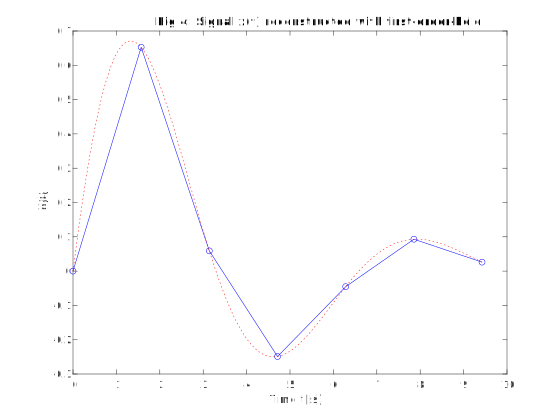

In [15]:
plot(td,xs,'bo-',tc,xc,'r:')
title('Fig 4: Signal x(t) reconstructed with first-order-hold')
ylabel('x(t)')
xlabel('Time t [s]')

In [16]:
open aliaseg1

In [17]:
open aliasing

In [18]:
open aliaseg2